<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/20_Image_FFT_Alapok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tartalom

Éldetektálás Fast Fourier Transformációval

Egy nagyon jó magyarázat a 2D Fourier Transzformációra - Mi a két tengely?
https://youtu.be/3gAZ0U66AEA

A könyvben pedig a 228. oldalon van a kiegészítő magyarázat.

In [ ]:
%%capture
!pip install plotly
!pip install chart-studio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot

## Különböző képeken fogom megmutatni, hogy néz ki a Fourier Transformáció

In [165]:
w = h = 512

X, Y = np.meshgrid(np.arange(0, w), np.arange(0, h))

x = np.arange(0, w)
y = np.arange(0, h)

A = np.zeros((w,h), dtype='uint8')

# Négyzet középen
B = A.copy()
B[int(w/4):-int(w/4), int(w/4):-int(w/4)] = 1

# Négyzet középen
B1 = A.copy()
B1[int(w/10):-int(w/10), int(w/10):-int(w/10)] = 1

# Négyzet középen
B2 = A.copy()
B2[int(w/2)-20:-int(w/2)+20, int(w/2)-20:-int(w/2)+20] = 1

# Kör középen
X,Y = np.meshgrid(np.arange(-h/2+1,h/2+1),np.arange(-w/2+1,w/2+1))
R2 = np.power(X,2) + np.power(Y,2)
C = A.copy()
C[R2 < 100**2] = 1

# Elipszis
R2 = np.power(X,2) + np.power(Y/2,2)
D = A.copy()
D[R2 < 100**2] = 1

# Kereszt
F = A.copy()
F[int(w/3):-int(w/3), int(w/6):-int(w/6)] = 1
F[int(w/6):-int(w/6), int(w/3):-int(w/3)] = 1

# Sinus x
s = np.sin(x/180*np.pi)
G = np.repeat(s, w).reshape((w,h))

# Sinus y
H = G.T

# Sinus + Sinus
I = G + H

# Sinus * Sinus
J = G * H

# Sinus x
s = np.sin(x/10*np.pi)
_T1 = np.repeat(s, w).reshape((w,h))
_T2 = _T1.T
K = _T1 + _T2
L = _T1 * _T2

# Special
s = np.sin(x/30*np.pi)
M = A.copy()
M[int(w/2), :] = (s+1)*127

In [115]:
surface = go.Surface(x = x, y = y, z = M)
data = [surface]

fig = go.Figure(data = data)

fig.update_layout(title = '', autosize=False,
                  width = 800, height = 600,
                  scene = dict(
                    xaxis_title = 'x',
                    yaxis_title = 'y',
                    zaxis_title = ' '),
                  margin = dict(l = 65, r = 50, b = 65, t = 60))

fig.show()

## Nézzük az egyes képek Fourier Transformáltjait

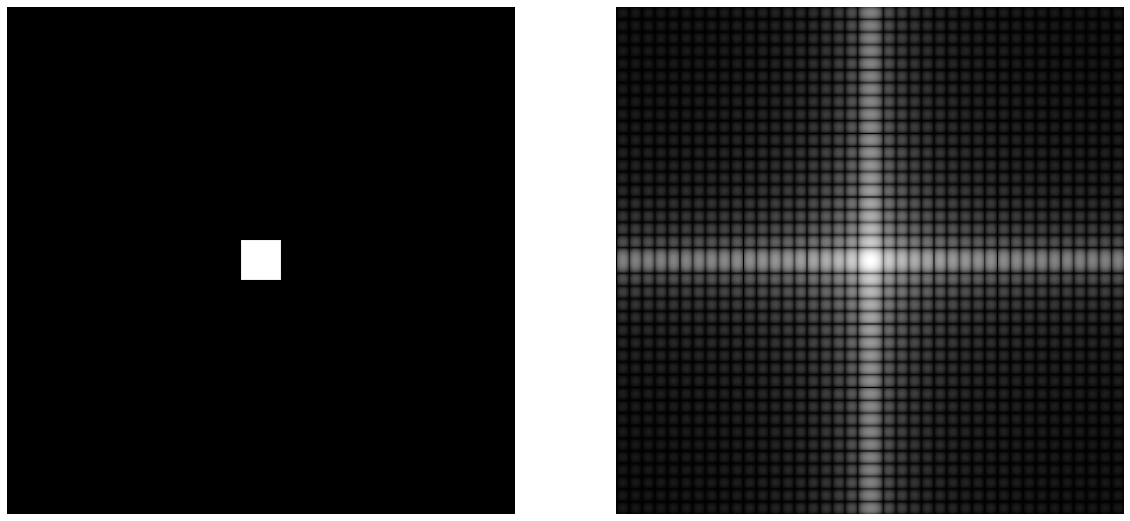

In [140]:
f = np.fft.fft2(B2)
fshift = np.fft.fftshift(f)
flog = np.log(np.abs(fshift)+1) # Put FFT on log scale

inv = np.fft.ifftshift(fshift)
inv_s = np.fft.ifft2(inv).real

fig, (a1, a2) = plt.subplots(1,2, figsize=(20, 14))
a1.imshow(inv_s,cmap='gray')
a1.axis('off')
a2.imshow(flog,cmap='gray')
a2.axis('off')
plt.show()

## Log scale

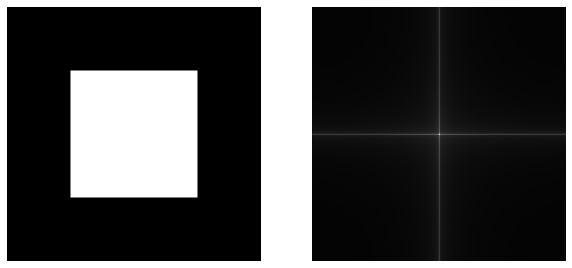

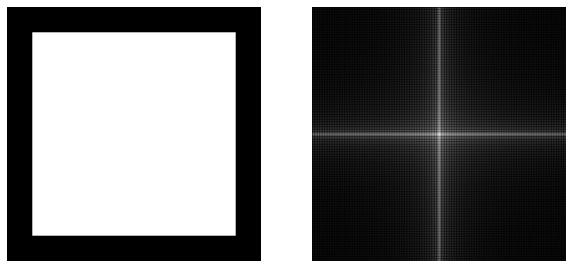

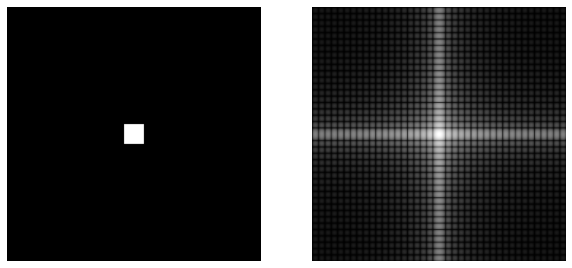

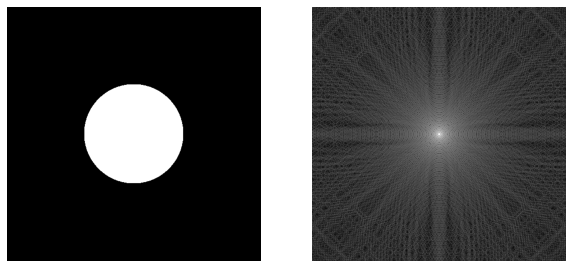

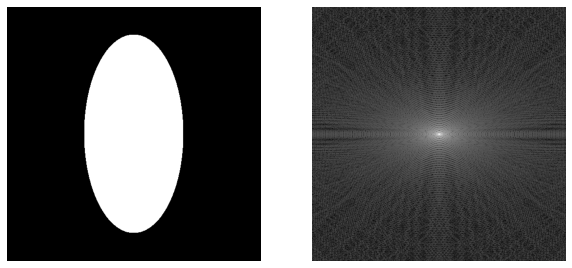

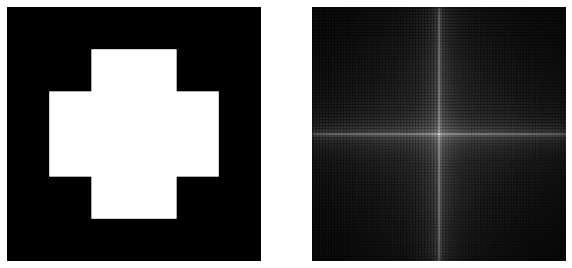

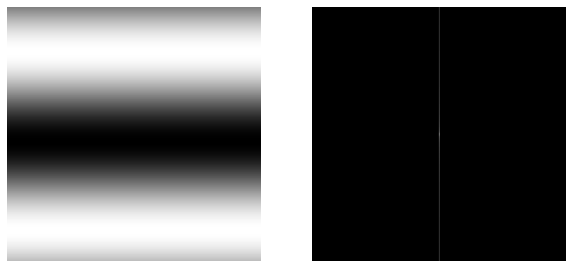

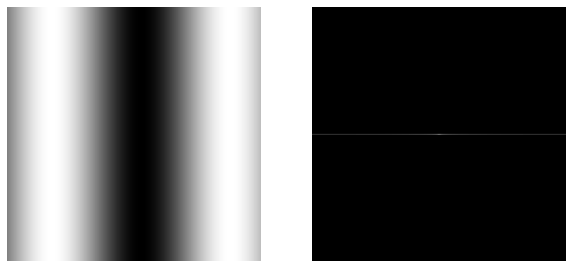

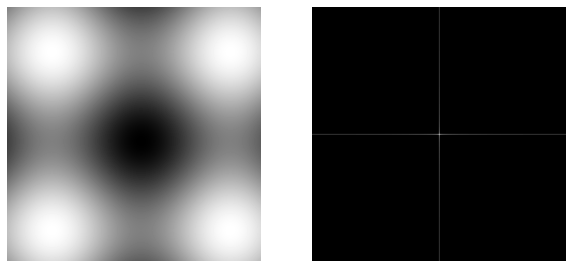

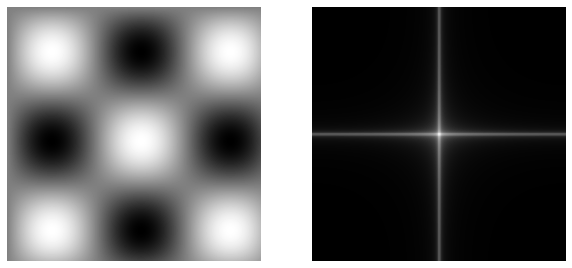

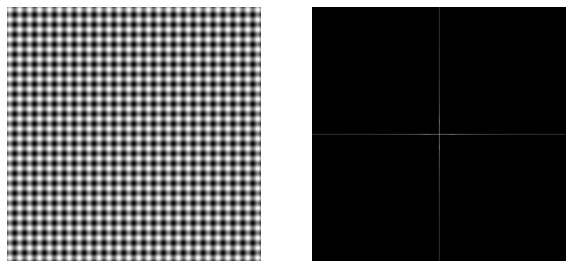

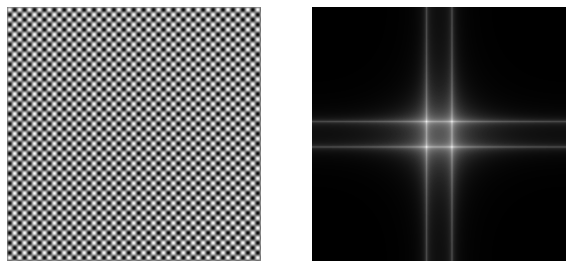

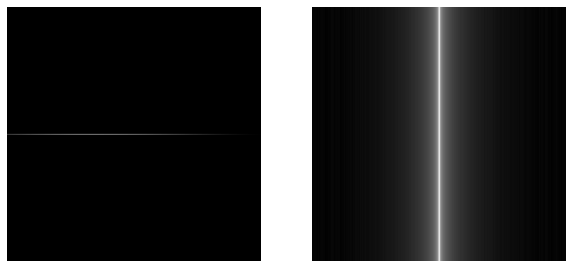

In [138]:
shapes = [B, B1, B2, C, D, F, G, H, I, J, K, L, M]

for shape in shapes:
  f = np.fft.fft2(shape)
  fshift = np.fft.fftshift(f)
  flog = np.log(np.abs(fshift)+1) # Put FFT on log scale

  inv = np.fft.ifftshift(fshift)
  inv_s = np.fft.ifft2(inv).real

  fig, (a1, a2) = plt.subplots(1,2, figsize=(10, 10))
  a1.imshow(inv_s,cmap='gray')
  a1.axis('off')
  a2.imshow(flog,cmap='gray')
  a2.axis('off')
  plt.show()

## Abs scale

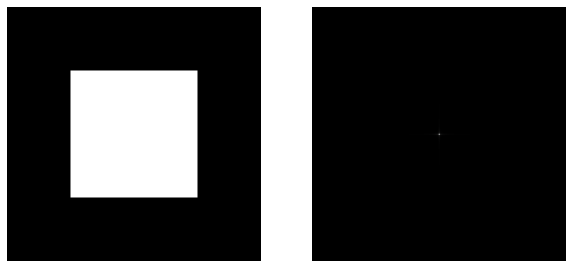

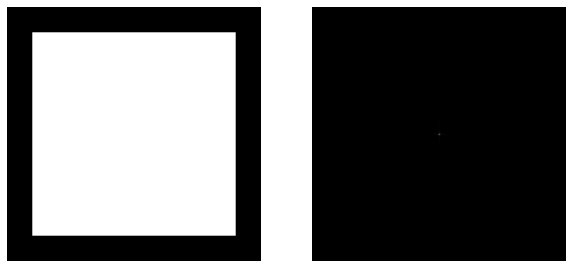

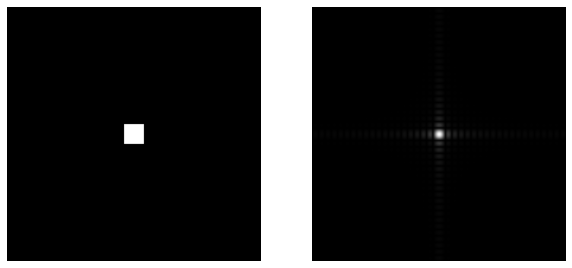

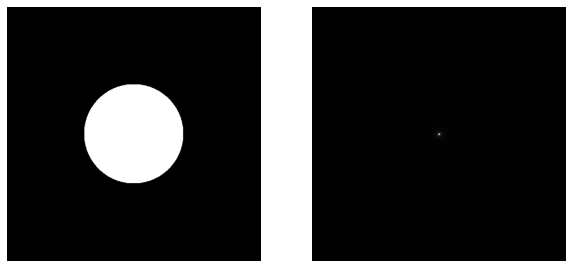

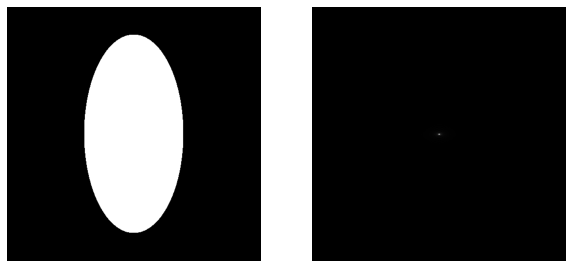

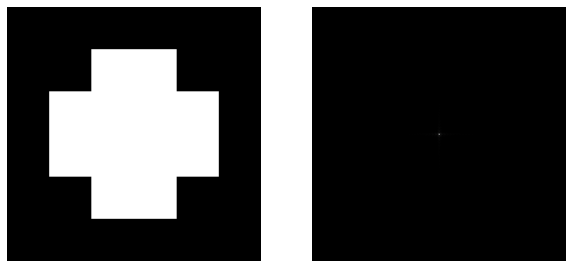

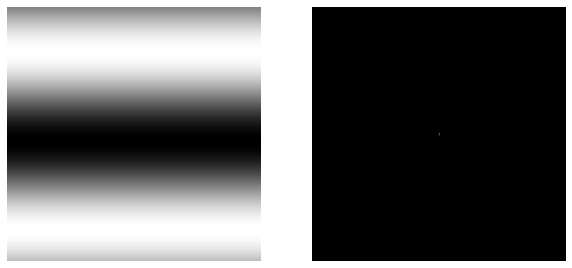

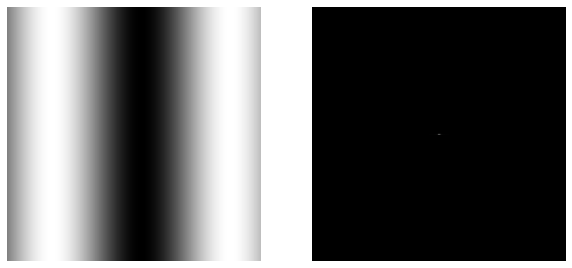

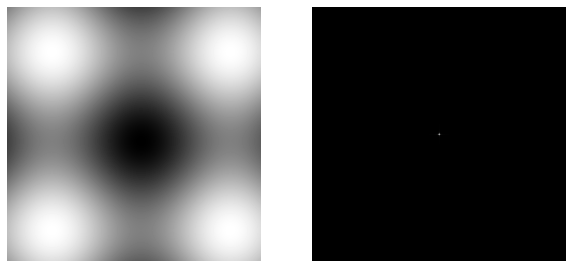

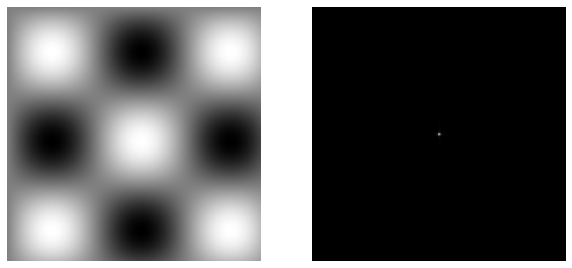

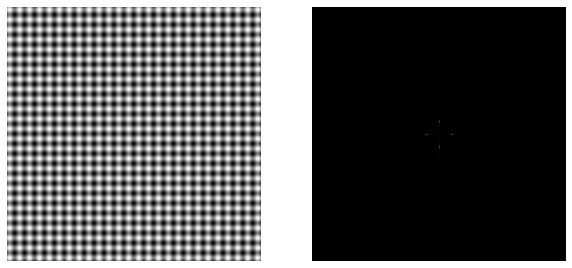

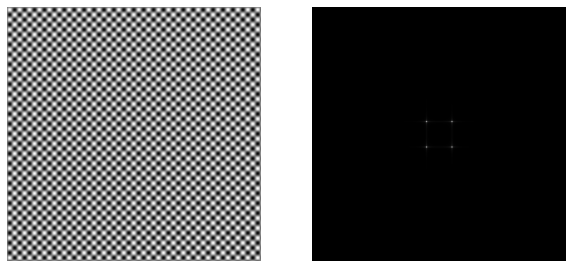

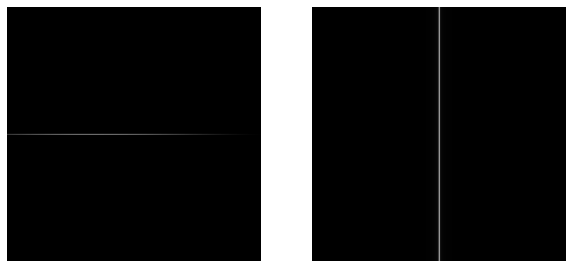

In [145]:
shapes = [B, B1, B2, C, D, F, G, H, I, J, K, L, M]

for shape in shapes:
  f = np.fft.fft2(shape)
  fshift = np.fft.fftshift(f)
  f = np.abs(fshift)

  inv = np.fft.ifftshift(fshift)
  inv_s = np.fft.ifft2(inv).real

  fig, (a1, a2) = plt.subplots(1,2, figsize=(10, 10))
  a1.imshow(inv_s,cmap='gray')
  a1.axis('off')
  a2.imshow(f,cmap='gray')
  a2.axis('off')
  plt.show()

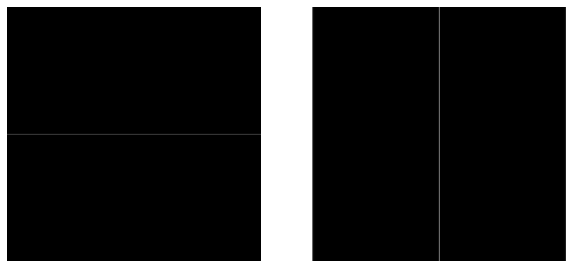

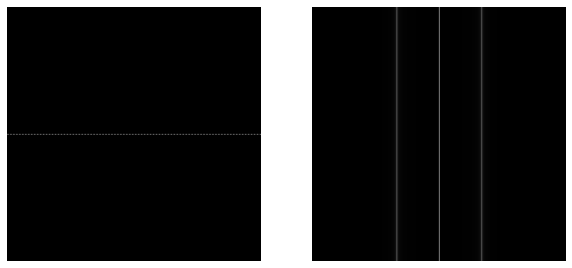

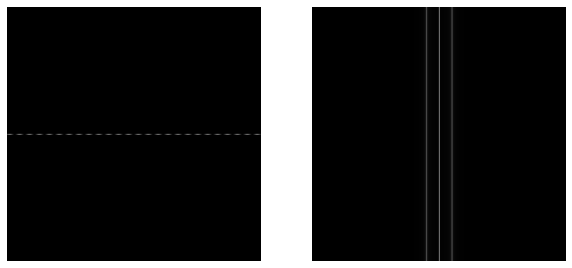

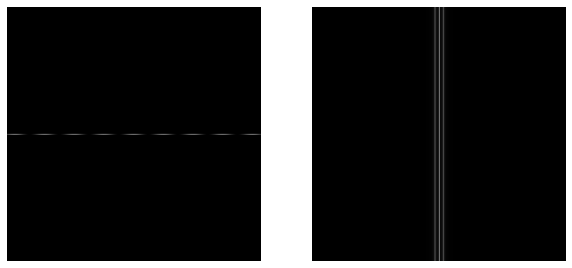

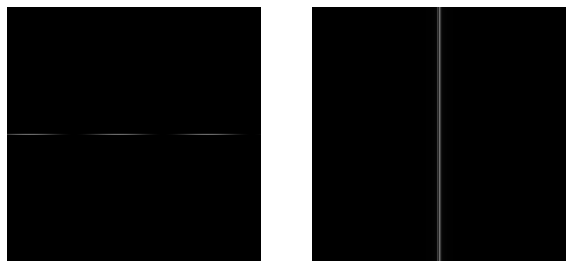

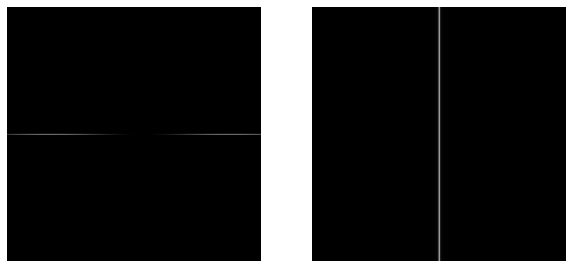

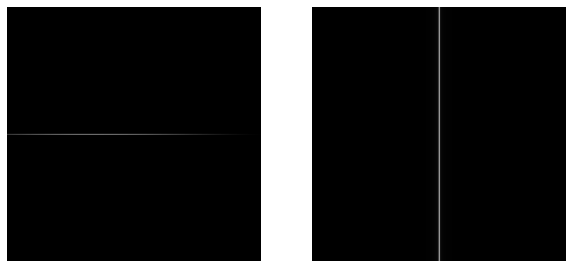

In [141]:
# Special

R = [1, 3, 10, 30, 90, 180, 360]

for r in R:
  s = np.sin(x/r*np.pi)
  M = np.zeros((w,h), dtype='uint8')
  np.zeros((w,h))
  M[int(w/2), :] = (s+1)*127
  img = M

  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)

  inv_s = np.fft.ifftshift(fshift)
  inv = np.fft.ifft2(inv_s).real

  fig, (a1, a2) = plt.subplots(1,2, figsize=(10, 10))
  a1.imshow(inv,cmap='gray')
  a1.axis('off')

  a2.imshow(np.abs(fshift),cmap='gray')
  a2.axis('off')
  plt.show()

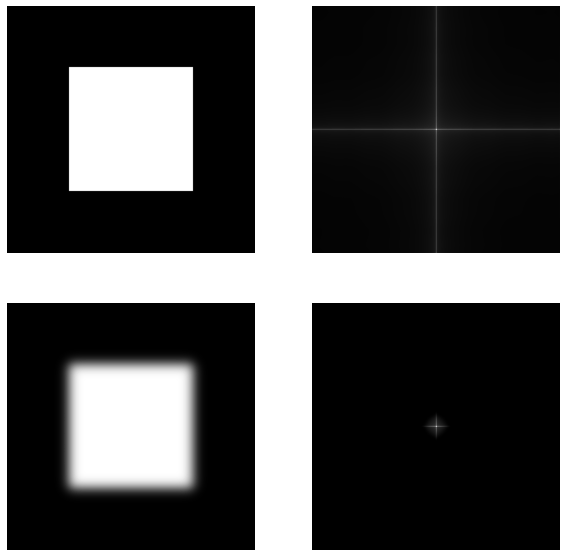

In [179]:
img = B

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Build Gaussian filter.
sigmax, sigmay = 10, 10
nrows, ncols = img.shape[0], img.shape[1]
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

# Apply mask
ftimagep = fshift * gmask

# Finally, take the inverse transform and show the blurred image
inv = np.fft.ifft2(ftimagep)
inv_r = np.fft.ifft2(inv).real

# Plot
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(np.log(np.abs(fshift)+1),cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(np.abs(inv),cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(np.log(np.abs(ftimagep)+1),cmap='gray')
ax[1,1].axis('off')
plt.show()

In [180]:
A = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

B = np.mean(A, -1)

B = B[::2, ::2]

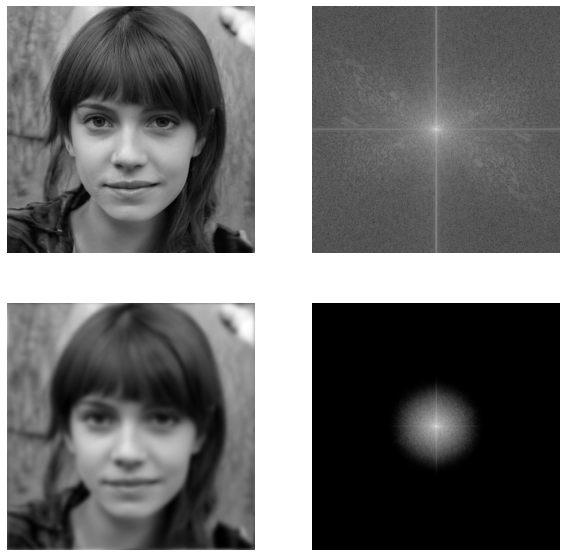

In [182]:
img = B

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Build Gaussian filter.
sigmax, sigmay = 30, 30
nrows, ncols = img.shape[0], img.shape[1]
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

# Apply mask
ftimagep = fshift * gmask

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)

# Plot
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(np.log(np.abs(fshift)+1),cmap='gray')
ax[0,1].axis('off')
ax[1,0].imshow(np.abs(imagep),cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(np.log(np.abs(ftimagep)+1),cmap='gray')
ax[1,1].axis('off')
plt.show()